## **Feature Selection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

---
## Load Data

In [2]:
input = '../data/clean-data/flats-house-cleaned-v4.csv'
output = '../data/clean-data/flats-house-cleaned-v5.csv'

df = pd.read_csv(input)

print(f"df.shape: {df.shape}")
df.head()

df.shape: (3540, 18)


,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,emaar mgf palm hills,sector 77,1.50,12744.0,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,97
1,flat,raheja vedaanta,sector 108,0.85,4637.0,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,65
2,flat,511 sarahah tower,sector 12,0.60,8333.0,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,0
3,flat,laxmi pareena,sector 99a,0.30,6667.0,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,0
4,flat,emaar gurgaon greens,sector 102,1.55,9394.0,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,152


- For predictive modeling, `price_per_sqft` is highly correlated with `price` column, we will drop `price_per_sqft` columns , becuse we are not going ask to user 

- User might not sure about society name, so we will not ask to user about society name. hence we will drop `society` column.

- insted of we can ask sector, property type, agePossession, luxury_score, floorNum, others


- Currently we are dropping these column might be useful in other task such as clustering, segmentation, etc.

In [3]:
train_df = df.drop(columns=['society','price_per_sqft'])

print(f"train_df.shape: {train_df.shape}")

train_df.head()

train_df.shape: (3540, 16)


,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 77,1.50,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,97
1,flat,sector 108,0.85,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,65
2,flat,sector 12,0.60,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,0
3,flat,sector 99a,0.30,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,0
4,flat,sector 102,1.55,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,152


---


### **Checking Correlation**

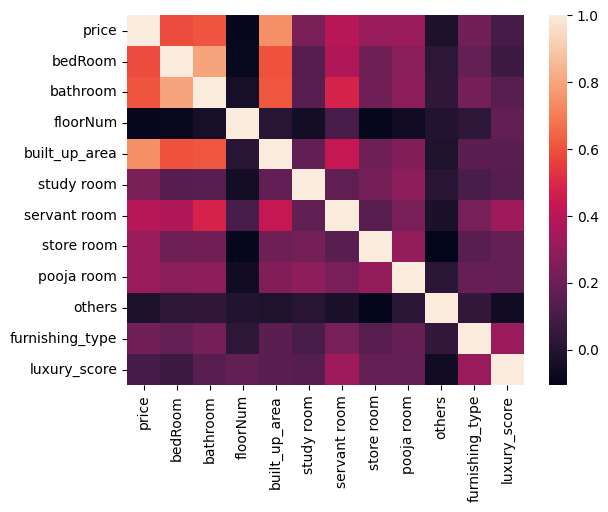

In [4]:
# Convert categorical columns to numeric
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix)
plt.show()

### correlation with price

In [5]:
# Convert categorical columns to numeric
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate correlation with price for numeric columns only
price_correlation = numeric_df.corr()['price'].sort_values(ascending=False)

print(price_correlation)

price              1.000000
built_up_area      0.741108
bathroom           0.605224
bedRoom            0.589648
servant room       0.392405
pooja room         0.321091
store room         0.314770
study room         0.243628
furnishing_type    0.213014
luxury_score       0.094326
others            -0.023159
floorNum          -0.084886
Name: price, dtype: float64


**Note** : from coorelation value ,It might be a case of multicollinearity in `built_up_area` , `bathroom` ,`bedRoom`.

  `Others` , `FloorNum` and `luxury_score` are lessly correlated with price.

---

**Feature Selection Techniques**:
1. Wrangling : Dropping columns
2. Filtering : Correlation
3. Wraping : 

- We will aplly feature selection techniques to drop the columns which are not going to be used in the model. 
- Along with We will apply engineering techniques to convert the categorical columns to numerical columns.

- numerical -> `luxury_score`, `others`, `floorNum`

- categorical -> `property_type`, `sector`, `agePossession`

---

## **Some Feature Engineering before applying Feature Selection**


## `luxury score`

- It is a numerical Column, user might not have idea about this  ,because we have created this featur.
- So we will convert this into categorical features :- 
High, 
Medium,
Low



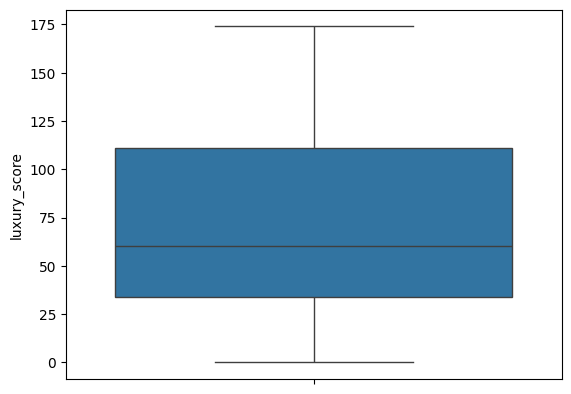

In [6]:
sns.boxplot(df['luxury_score'])
plt.show()

Based on the box plot we are converting numerical feature `luxury_score`into categorical feature :-

- 0 - 50 : Low Luxury

- 50 - 150 : Medium

- 150 - 175 : High

In [7]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [8]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)
train_df.drop(columns=['luxury_score'],inplace=True)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category
0,flat,sector 77,1.50,3,3,3,4.0,Relatively New,1310.0,0,0,0,0,0,2,Medium
1,flat,sector 108,0.85,3,3,2,2.0,Relatively New,1500.0,0,1,0,0,0,0,Medium
2,flat,sector 12,0.60,2,2,1,0.0,New Property,800.0,0,0,0,1,0,1,Low
3,flat,sector 99a,0.30,2,1,0,12.0,New Property,500.0,0,0,0,0,0,0,Low
4,flat,sector 102,1.55,3,4,3,7.0,Relatively New,1315.0,0,1,0,0,0,2,High


---
## `floorNum`

- User might not sure about floor Number , So, we are not going to ask to user about specific floorNum , So we are converting into category

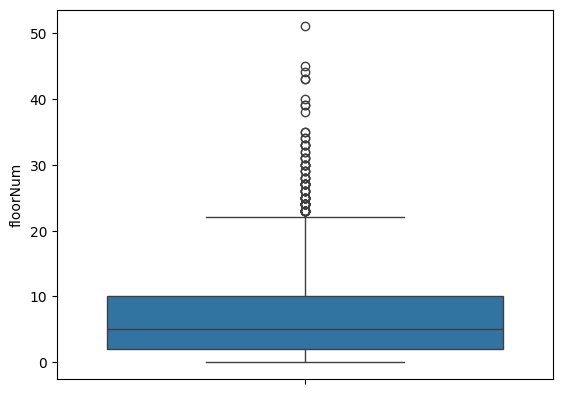

In [9]:
sns.boxplot(df['floorNum'])
plt.show()

Based on the box plot we are converting numerical feature `floorNum` into categorical feature :-

- 0 - 2 : Low Floor

- 3 - 10 : Mid Floor

- 10 - 51 : High Floor

In [10]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [11]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)
train_df.drop(columns=['floorNum'],inplace=True)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 77,1.50,3,3,3,Relatively New,1310.0,0,0,0,0,0,2,Medium,Mid Floor
1,flat,sector 108,0.85,3,3,2,Relatively New,1500.0,0,1,0,0,0,0,Medium,Low Floor
2,flat,sector 12,0.60,2,2,1,New Property,800.0,0,0,0,1,0,1,Low,Low Floor
3,flat,sector 99a,0.30,2,1,0,New Property,500.0,0,0,0,0,0,0,Low,High Floor
4,flat,sector 102,1.55,3,4,3,Relatively New,1315.0,0,1,0,0,0,2,High,Mid Floor


---

**Converting Categorical Features into Numerical Features , because the Technique for feature selection will work on numerical data only**

OrdinalEncoder : It convert ordinal Cateogrical feature into Numerical 

In [12]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

print("Ordinal Encoding on thses categorical_columns : ",categorical_cols.values)

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])


Ordinal Encoding on thses categorical_columns :  ['property_type' 'sector' 'balcony' 'agePossession' 'luxury_category'
 'floor_category']


In [13]:
# ordinal encoded data
data_label_encoded.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,97.0,1.50,3,3,3.0,3.0,1310.0,0,0,0,0,0,2,2.0,2.0
1,0.0,19.0,0.85,3,3,2.0,3.0,1500.0,0,1,0,0,0,0,2.0,1.0
2,0.0,27.0,0.60,2,2,1.0,1.0,800.0,0,0,0,1,0,1,1.0,1.0
3,0.0,119.0,0.30,2,1,0.0,1.0,500.0,0,0,0,0,0,0,1.0,0.0
4,0.0,13.0,1.55,3,4,3.0,3.0,1315.0,0,1,0,0,0,2,0.0,2.0


In [14]:
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [15]:
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,97.0,3,3,3.0,3.0,1310.0,0,0,0,0,0,2,2.0,2.0
1,0.0,19.0,3,3,2.0,3.0,1500.0,0,1,0,0,0,0,2.0,1.0
2,0.0,27.0,2,2,1.0,1.0,800.0,0,0,0,1,0,1,1.0,1.0
3,0.0,119.0,2,1,0.0,1.0,500.0,0,0,0,0,0,0,1.0,0.0
4,0.0,13.0,3,4,3.0,3.0,1315.0,0,1,0,0,0,2,0.0,2.0


In [16]:
# y_label encoded data : price column
y_label.head()

0    1.50
1    0.85
2    0.60
3    0.30
4    1.55
Name: price, dtype: float64

---

## **Applying 8 Feature Selection Techniques :-**
1. Correlation
2. Random Forest Feature Importance
3. Gradient Boosting Feature importances
4. Permutation Importance
5. LASSO
6. RFE
7. Linear Regression Weights
8. SHAP

We are not relying on single feature Selection technquie , hence

- Each Technique will give us the feature importance ,
- we will merge all the feature importance 
- Then we will normalize the feature importance and then we will drop the features which are not going to be used in the model.

**NOTE** :- We have used ordinal encoding , so tree based model are more reliable than Linear Models



---

### **Technique 1 - Correlation Analysis**

- Correlation Analysis is the oldest feature selection technique , but it is still a good technique to get the feature importance.

- correlation tells linear relationship between two features

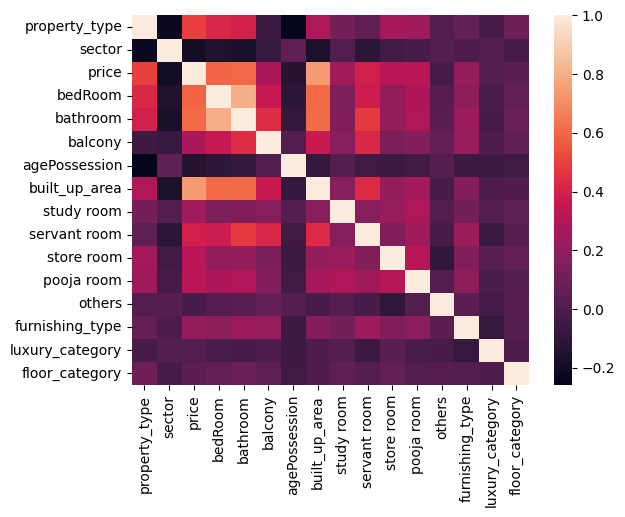

In [17]:
sns.heatmap(data_label_encoded.corr())
plt.show()

**correlation of `price` with all  columns:-**

In [18]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1.sort_values(by='corr_coeff',ascending=False)

,feature,corr_coeff
1,price,1.000000
6,built_up_area,0.741108
3,bathroom,0.605224
2,bedRoom,0.589648
8,servant room,0.392405
10,pooja room,0.321091
9,store room,0.314770
4,balcony,0.268858
7,study room,0.243628
12,furnishing_type,0.213014


### **Technique 2 - Random Forest Feature Importance**

- Tree based algorithms have inherent quality that gives us feature importance.

- We train a Random Forest regressor on label encoded data and get the feature importance.

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.638354
0,property_type,0.109295
1,sector,0.107031
3,bathroom,0.026517
2,bedRoom,0.025667
8,servant room,0.018431
5,agePossession,0.016001
4,balcony,0.012661
9,store room,0.010665
12,furnishing_type,0.007549


### **Technique 3 - Gradient Boosting Feature importances**

- We train Gardient Boosting for Feature importance

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.660897
1,sector,0.110671
0,property_type,0.107824
2,bedRoom,0.036569
3,bathroom,0.032310
8,servant room,0.021737
9,store room,0.013274
5,agePossession,0.007510
4,balcony,0.001957
7,study room,0.001889


### **Technique 4 - Permutation Importance**

 
- In this section, we will explore the Permutation Importance technique to determine the importance of features.
- Permutation Importance is a model-agnostic method that evaluates the importance of a feature by measuring the 
- increase in the model's prediction error after permuting the feature's values. This technique helps us understand the impact of each feature on the model's performance.

- We will use the Random Forest regressor trained on label encoded data to calculate the Permutation Importance.
- The steps involved are:
1. Split the data into training and testing sets.
2. Train the Random Forest regressor on the training set.
3. Calculate the Permutation Importance on the testing set.
4. Organize the results into a DataFrame and sort the features by their importance scores.


In [21]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.670498
0,property_type,0.236626
1,sector,0.160875
3,bathroom,0.014086
2,bedRoom,0.008284
4,balcony,0.005822
8,servant room,0.005428
11,others,0.000700
12,furnishing_type,-0.000248
14,floor_category,-0.000549


### **Technique 5 - LASSO**

- linear model

In [22]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.445486
0,property_type,0.707633
3,bathroom,0.243186
9,store room,0.203786
7,study room,0.172124
8,servant room,0.163227
12,furnishing_type,0.137987
10,pooja room,0.072579
2,bedRoom,0.065613
13,luxury_category,0.052332


### **Technique 6 - RFE**

- recursive feature elemination : best technique

In [23]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.638113
0,property_type,0.108499
1,sector,0.108245
3,bathroom,0.027373
2,bedRoom,0.027104
8,servant room,0.016681
5,agePossession,0.015580
4,balcony,0.013274
13,luxury_category,0.008465
12,furnishing_type,0.007682


### **Technique 7 - Linear Regression Weights**

In [24]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data

lin_reg = LinearRegression()
lin_reg.fit(X_label, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
0,property_type,1.735685
9,store room,0.726197
7,study room,0.463485
8,servant room,0.359181
10,pooja room,0.200499
3,bathroom,0.176393
12,furnishing_type,0.165004
13,luxury_category,0.091483
2,bedRoom,0.056573
6,built_up_area,0.001236


### **Technique 8 - SHAP**

In [25]:
# !pip install shap

In [26]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.212032
0,property_type,0.478772
1,sector,0.387152
3,bathroom,0.118889
8,servant room,0.090347
2,bedRoom,0.061102
4,balcony,0.042609
5,agePossession,0.026951
14,floor_category,0.024331
12,furnishing_type,0.023954


**Merge all the feature importance dataframe**

In [27]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.195454,0.107031,0.110671,0.160875,-0.047045,0.108245,-0.001560,0.387152
bedRoom,0.589648,0.025667,0.036569,0.008284,0.065613,0.027104,0.056573,0.061102
bathroom,0.605224,0.026517,0.032310,0.014086,0.243186,0.027373,0.176393,0.118889
balcony,0.268858,0.012661,0.001957,0.005822,-0.044511,0.013274,-0.059020,0.042609
agePossession,-0.136964,0.016001,0.007510,-0.001395,-0.000000,0.015580,-0.004512,0.026951
built_up_area,0.741108,0.638354,0.660897,0.670498,1.445486,0.638113,0.001236,1.212032
study room,0.243628,0.007395,0.001889,-0.002866,0.172124,0.007591,0.463485,0.015248
servant room,0.392405,0.018431,0.021737,0.005428,0.163227,0.016681,0.359181,0.090347
store room,0.314770,0.010665,0.013274,-0.003452,0.203786,0.007242,0.726197,0.020339


**Normalize the score**

In [28]:

final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.057768,0.120164,0.124046,0.188387,-0.019300,0.121419,-0.000759,0.188441
bedRoom,0.174274,0.028816,0.040988,0.009701,0.026918,0.030403,0.027514,0.029741
bathroom,0.178878,0.029771,0.036215,0.016495,0.099767,0.030704,0.085787,0.057868
balcony,0.079463,0.014215,0.002193,0.006818,-0.018261,0.014889,-0.028704,0.020739
agePossession,-0.040481,0.017965,0.008417,-0.001634,-0.000000,0.017476,-0.002194,0.013118
built_up_area,0.219040,0.716685,0.740770,0.785162,0.593012,0.715774,0.000601,0.589941
study room,0.072006,0.008303,0.002117,-0.003356,0.070614,0.008515,0.225413,0.007422
servant room,0.115978,0.020693,0.024364,0.006356,0.066964,0.018711,0.174685,0.043975
store room,0.093032,0.011974,0.014878,-0.004042,0.083604,0.008123,0.353181,0.009900


**Get the Mean Feature Importance**

In [29]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.709666
sector             0.148492
bathroom           0.034210
bedRoom            0.027930
servant room       0.022820
balcony            0.011771
agePossession      0.011069
store room         0.008167
furnishing_type    0.005982
floor_category     0.005760
luxury_category    0.005004
study room         0.004600
pooja room         0.002729
others             0.001800
dtype: float64

These features are not looks importance so , We can removes these features by `study room`,
`pooja room`,
`others`

- Before Removing these features we need to prove that these feature will not impact the model performace , for that we are training a RandomForest Model with and without including these column respectively and comparing the performance of the model.

In [30]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
print("With all the cols : ",scores.mean())

With all the cols :  0.8088850541568515


In [31]:
# without `pooja room`, `study room`, `others`

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
print("Without `pooja room`, `study room`, `others` : ",scores.mean())


Without `pooja room`, `study room`, `others` :  0.8101169082195797


Now we can remove these features `pooja room`,`study room`,`others` from the dataset and train the model again.

In [32]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,97.0,3,3,3.0,3.0,1310.0,0,0,2,2.0,2.0,1.50
1,0.0,19.0,3,3,2.0,3.0,1500.0,1,0,0,2.0,1.0,0.85
2,0.0,27.0,2,2,1.0,1.0,800.0,0,0,1,1.0,1.0,0.60
3,0.0,119.0,2,1,0.0,1.0,500.0,0,0,0,1.0,0.0,0.30
4,0.0,13.0,3,4,3.0,3.0,1315.0,1,0,2,0.0,2.0,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,0.0,91.0,3,3,4.0,1.0,1900.0,1,0,0,2.0,2.0,1.66
3536,0.0,85.0,1,1,0.0,3.0,610.0,0,0,0,1.0,1.0,0.80
3537,0.0,93.0,4,5,4.0,3.0,2629.0,1,0,2,0.0,0.0,3.85
3538,0.0,111.0,3,3,3.0,4.0,1288.0,0,0,0,1.0,1.0,1.25


In [33]:
export_df.to_csv(output, index=False)

**End**

---